# <div style="text-align: center">  Analyzing and Measuring Rising Sea Levels 
<div style="text-align: center">**Authors: TingFang Pan and Wendy C. Velasquez Ebanks** </div>



In [1]:
# Libraries  required for the resalization of this project
import nbconvert
import pandas as pd
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
import IPython
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

C:\Users\Wendy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## I. Introduction

<div style="text-align: justify">In the last years, we have seen an accelerating rising on seawater levels around the world. Climate change and human activity are part of the two main causes: first of all, by warming ocean water; as it warms, water expands, taking up more space on earth. Second, by melting land-based ice (glaciers and ice sheets), sending more water to our oceans [[9]](https://www.nationalgeographic.com/environment/global-warming/sea-level-rise/).
Consequently, if they keep increasing at an accelerated rhythm as we have seen, we will have devastating effects on coastal habitats. As seawater reaches farther inland, it can cause destructive erosion, wetland flooding, aquifer and agricultural soil contamination that could cause lost of habitat for fish, birds, and plants. As such, our intend with the realization of this project is to analyze and measure seawater levels in at least both coasts of the US, in order to identify and predict how this will affect the mainland.
By doing this we will be able to identify vulnerable areas, that could suffer from the rising seawater levels in subsequent years. The data used for this study was collected from National Oceanic Atmospheric Administration (NOAA)'s website on sea levels measurements. We did the necessary pre-processing for the **US dataset only**. We began by choosing three years 1997, 2008, and 2016 as a test. Then used continues data from 2000 forward, and calculated the probability of sea level increment on both coasts to predict and forecast on the next two years. We used the Time Series Model and the ARIMA Model. 
We consider this a subject worth discussing as it has a direct impact on everyone as well as higher impact on future generations. </div>    

C:\Users\Wendy\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


Text(0.5,1,'The American Continent and both oceans in the globe')

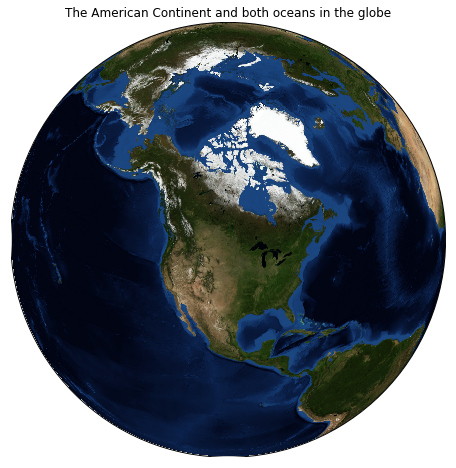

In [2]:
# defines the size of the image displayed
plt.figure(figsize=(8, 8))

#Projection type
worldMap = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)

# defines the color of the map
worldMap.bluemarble(scale=0.5);
plt.title("The American Continent and both oceans in the globe")

## II. Background

Recently, we have seen an accelerating rising in sea levels around the world; these are measured constantly around the world through tide stations and satellite laser altimeters. Thus, the reading of tide gauge and satellite measurements, tell us that from last century to these days, the Global Mean Sea Level (GMSL) rose  4 to 8 inches which is from 10 to 20 centimeters more of the shore [[3]](https://oceanservice.noaa.gov/facts/sealevel.html). In addition, the tide stations around the globe tell the story of what is happening at a local level. By measuring the height of the water along the coast and with respect to an specific point on land [[8]](https://www.nasa.gov/feature/goddard/2018/new-study-finds-sea-level-rise-accelerating). Climate change and human activity are part of the two main causes: first of all, by warming ocean water; as it warms, water expands, taking up more space on earth. Second, by melting land-based ice (glaciers and ice sheets), sending more water to our oceans [[9]](https://www.nationalgeographic.com/environment/global-warming/sea-level-rise/). Moreover, over the past 20 years, the annual rate of rise  has been 0.13 inches (3.2 millimeters) a year, roughly twice the average speed of the preceding 80 years [[3]](https://oceanservice.noaa.gov/facts/sealevel.html).


Previous research and records about sea level discussed the increasing acceleration on sea levels over the last 40 years. Church and White [[1]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2005GL024826) have worked on data from 1950 to 2000, on which they found a significant acceleration on sea levels  from1993 forward. If the levels keep increasing at an accelerated rhythm as we have seen, even smallest increases will have devastating effects on coastal habitats.Moreover, this team worked on data from 1870 and found a significant sea‐level rise from January 1870 to December 2004 of 195 mm. A rate of increase per year of 1.7 ± 0.3 mm yr−1 up to that point in time, and an acceleration of  0.013 ± 0.006 mm yr−2 in subsequent years [[1]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2005GL024826).


A method commonly used among several studies reviewed dealt with local data, (usually tide gauge data) or regional/global averages, in order to determine when and where the levels may or may not have accelerated during a specific period of time during the last century. This process is consistent among all the studies (how they processed and used the data). However, for them to have good results the study must cover a long period of time to see the difference from one point in time to another  [[2]](https://www.researchgate.net/publication/265467321_Time_and_tide_analysis_of_sea_level_time_series). Additionally, the mathematical model used for visualization of such data are all based on a time series model, a supervised learning model allowing to see graphically the escalating increments throughout the years in question.

## III. Process and Methodology 

 Our process consisted on the collection and pre-processing of the datasets related to each city on both East and West coasts of the United States. The datasets were originally downloaded from the National Oceanic Atmospheric Administration (NOAA) website on sea levels.

These datasets contained records on sea levels in units of day, month, and year per each city near the edge of the beach on both coasts. We classified the data as **East** and **West** according to each city and made our first test by taking only the data per each city for the years of 1997, 2008 and 2016 and removing all years in between as well as cities that did not have such data recorded.

Our final calculations contained 2000-2016 sea level records, since the graphs would be too small to represent the actual data. We concatenated the data of the cities belonging to each side of the coasts. Afterwards, we used averages to fit the information, so we could easily represent the results graphically. Up to this point we use a simple time series model. 

For the forecasting and prediction, we used the ARIMA model;  removing trend, and seasonality, leaving the stationary data that simplify the forecasting of the next two years on sea levels for both coasts.  

The first step, involved reading the raw files downloaded and then passed them into dataframes, and added the headers to all the files to facilitate data manipulation, since none of them originally contained headers. After that divided the datasets into two types: 

- One detailed (describing the hours sea_level situation)
- One simpler (describing the days sea_level situation). 

We then converted the four files into four dictionaries, on which a key is the filename of the dataset, and the values relate to the data contained in the dataset inside the file.

In [3]:
east_dir = "DATA/EAST"
west_dir = "DATA/WEST"
east_dir_list = os.listdir(east_dir)
west_dir_list = os.listdir(west_dir)
east_d_dict = {} # key is a file name(string type), item is a dataframe
east_h_dict = {}
west_d_dict = {}
west_h_dict = {}
for east_fname in east_dir_list:
    file_directory = east_dir + "/" + east_fname 
    #read csv file to dataframe from file_directory
    
    k = east_fname.rfind(".")
    d_or_h_index = k - 1 #determine whether the file is about d or about h
    
    if(east_fname[d_or_h_index] == 'd'):
        df_file = pd.read_csv(file_directory,names = ["year", "month", "day", "sea_level"])
        df_file["date"] = pd.to_datetime(df_file[['day','month','year']])
        east_d_dict[east_fname] = df_file
    else:
        df_file = pd.read_csv(file_directory,names = ["year", "month", "day","hour","sea_level"])
        df_file["date"] = pd.to_datetime(df_file[['day','month','year']])
        east_h_dict[east_fname] = df_file

for west_fname in west_dir_list:
    file_directory = west_dir + "/" + west_fname 
    #read csv file to dataframe from file_directory
    
    k = west_fname.rfind(".")
    d_or_h_index = k - 1 #determine whether the file is about d or about h
    
    if(west_fname[d_or_h_index] == 'd'):
        df_file = pd.read_csv(file_directory,names = ["year", "month", "day", "sea_level"])
        df_file["date"] = pd.to_datetime(df_file[['day','month','year']])
        west_d_dict[west_fname] = df_file
    else:
        df_file = pd.read_csv(file_directory,names = ["year", "month", "day","hour","sea_level"])
        df_file["date"] = pd.to_datetime(df_file[['hour','day','month','year']])
        west_h_dict[west_fname] = df_file
#print([key for key in west_h_dict])
print(west_h_dict["Cordova_h.csv"])

        year  month  day  hour  sea_level                date
0       1964      5    1    10       4511 1964-05-01 10:00:00
1       1964      5    1    11       4968 1964-05-01 11:00:00
2       1964      5    1    12       5121 1964-05-01 12:00:00
3       1964      5    1    13       4999 1964-05-01 13:00:00
4       1964      5    1    14       4481 1964-05-01 14:00:00
5       1964      5    1    15       3688 1964-05-01 15:00:00
6       1964      5    1    16       2896 1964-05-01 16:00:00
7       1964      5    1    17       2256 1964-05-01 17:00:00
8       1964      5    1    18       1798 1964-05-01 18:00:00
9       1964      5    1    19       1585 1964-05-01 19:00:00
10      1964      5    1    20       1737 1964-05-01 20:00:00
11      1964      5    1    21       2164 1964-05-01 21:00:00
12      1964      5    1    22       2835 1964-05-01 22:00:00
13      1964      5    1    23       3475 1964-05-01 23:00:00
14      1964      5    2     0       4054 1964-05-02 00:00:00
15      

### Methodology: Time Series Model 

A **"Time Series"** is the process of using statistical techniques to explain the model, a time-dependent series of data points. The forecasting of time series is the process of using the model to generate predictions (forecasts) for future events based on known past events [[4]](https://wiki.pentaho.com/display/DATAMINING/Time+Series+Analysis+and+Forecasting+with+Weka#TimeSeriesAnalysisandForecastingwithWeka-1Introduction). 
Therefore, the model fits our data for this study perfectly.

![time_series_graph](timeseriesim.png)


Where we have observations $X_1\ldots,X_n$ and $X_t$ denotes the observation at time 𝑡. In terms of machine learning, we consider the prediction as a supervised learning problem; where we have to infer from historical data the possibly nonlinear dependence between the input (past data on sea levels) and the output (future of rising sea levels).

We reduced trend and seasonality, leaving only the stationary data to make the forecasting using the equations below.

> ### The Autoregressive Model: AR
> An autoregressive model predicts the response $X_t$ using a linear combination of past values of the variable. Parameterized by 𝑝, (the number of past values that need to be included).

> $$X_t = \mathbf\theta_0 + \mathbf\theta_1 X_(t-1) + \mathbf\theta_2 X_(t-2) + \mathbf\theta_p X_(t-p)$$

> ### The ARIMA Model for Predictions and Forecasting

> We Combined an autoregressive (AR) with the moving average (MA) model, to get the ARIMA model.

> $$X_t = \mathbf\theta_0 + \mathbf\theta_1 X_(t-1)_ + \mathbf\theta_2 X_(t-2)_ + \mathbf\theta_p X_(t-p) + \mathbf\beta_0  + \mathbf\beta_1 \in_(t-1) + \mathbf\beta_2 \in_(t-2)+ \mathbf\beta_q \in_(t-q)$$

> Note that now we are regressing on $X'_t$, which is the differenced series $X_t$. The order
of difference is determined by the parameter 𝑑. For example, if 𝑑 = 1:

> $$X'_t = X_t − X_(t-1)$ for $t = 2, 3,…,N $$

>So the ARIMA model is parameterized by: p (order of the AR part), q (order of the MA
part), and d (degree of differencing).

### Our Main Area of Focus

Text(0.5,1,'US Coasts')

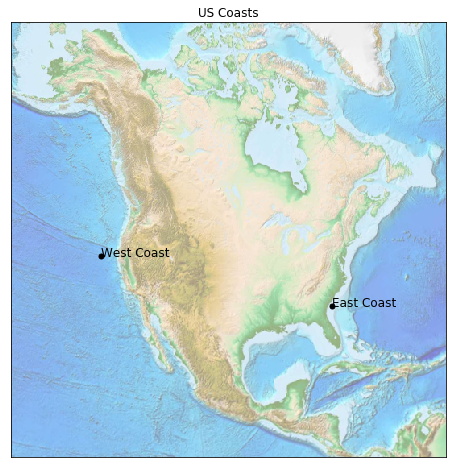

In [4]:
#dimensions of the figure
fig = plt.figure(figsize=(8, 8))

#Projection of the map
USmap = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100,)

# Topografic Scale
USmap.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
#coordinates of the points that signalize both coasts
x, y = USmap(-121.5, 60.5)
x1, y1 = USmap(-127.3, 38.7)

# adds the point and title to both sides of the map
plt.plot(x1, y1, 'ok', markersize=5)
plt.text(x1, y1, 'West Coast', fontsize=12);
plt.plot(y, x, 'ok', markersize=5)
plt.text(y, x, 'East Coast', fontsize=12);
plt.title("US Coasts")

## IV. Calculations, and Findings  
After pre-pocessing the information, we plotted the information of the first three years selected (1997, 2008, and 2016). From this we part our initial observations:

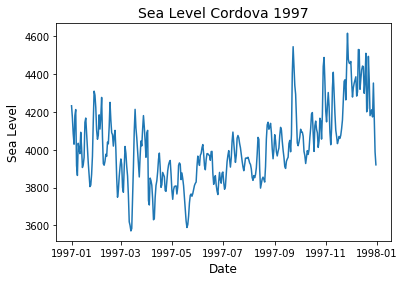

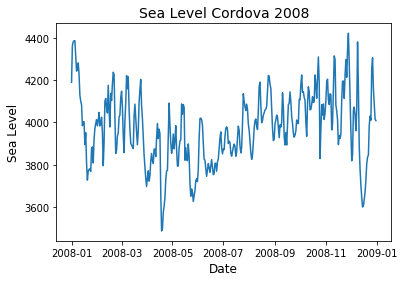

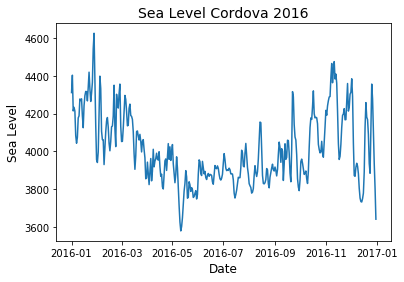

In [5]:
# Individual graphs on sea levels for only one city with the initial three points in time chosen 
# 1997, 2008, and 2016

pdf = west_d_dict['Cordova_d.csv']
df = pdf.loc[(pdf['year'] == 1997)]
plt.plot(df['date'],df['sea_level'])
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sea Level', fontsize = 12)
plt.title('Sea Level Cordova 1997', fontsize = 14)
plt.show()

df = pdf.loc[(pdf['year'] == 2008)]
plt.plot(df['date'],df['sea_level'])
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sea Level', fontsize = 12)
plt.title('Sea Level Cordova 2008', fontsize = 14)
plt.show()

df = pdf.loc[(pdf['year'] == 2016)]
plt.plot(df['date'],df['sea_level'])
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sea Level', fontsize = 12)
plt.title('Sea Level Cordova 2016', fontsize = 14)
plt.show()

### Removing Trend and Seasonality
The most significant part on preprocessing the data on time series problems, is in removing trend and seasonality from the entire dataset, particularly, when these are big. 

To make the predictions we used data for 2000 to 2016 years and then we removed trend and seasonality, to obtain the stationary data. We created a rolling function that will successfully measured the trend, and used a sliding window of 365 days for it.

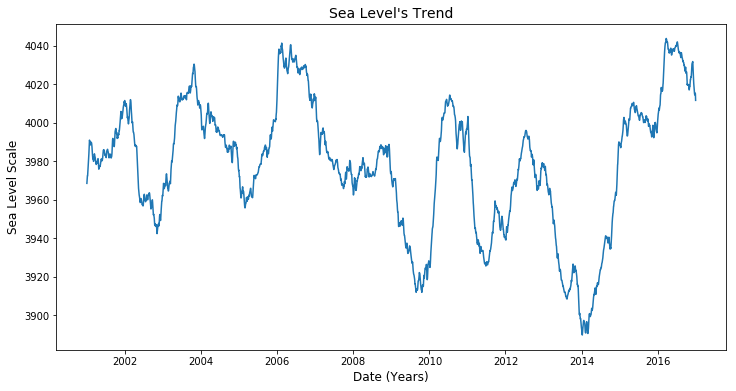

In [6]:
df = pdf.loc[(pdf['year'] >= 2000)]      
moving_avg = df['sea_level'].rolling(365).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(df['date'], moving_avg)
plt.xlabel('Date (Years)', fontsize=12)
plt.ylabel('Sea Level Scale', fontsize=12)
plt.title('Sea Level\'s Trend', fontsize=14)
plt.show()

The graph below contains our data after Removing the trend from it. 

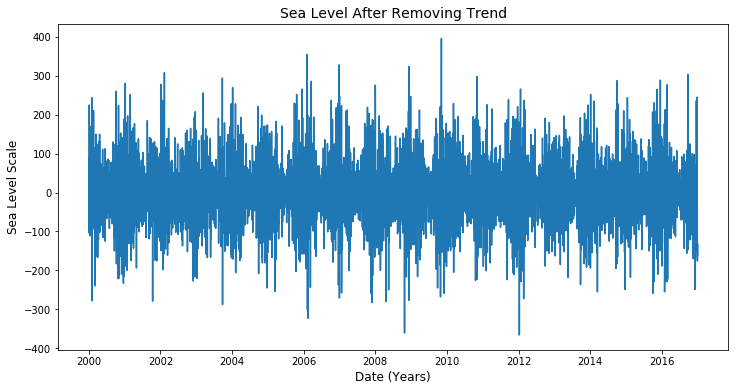

In [7]:
detrended = df['sea_level'].diff()
fig = plt.figure(figsize=(12,6))
plt.plot(df['date'], detrended)
plt.xlabel('Date (Years)', fontsize=12)
plt.ylabel('Sea Level Scale', fontsize=12)
plt.title('Sea Level After Removing Trend', fontsize=14)
plt.show()

This next graph display our results after removing both trend and seasonality from the data.

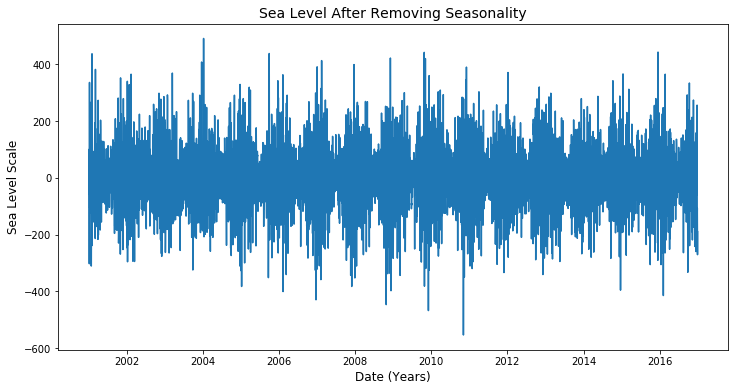

In [8]:
seasonal_diff = detrended.diff(365)
#print(type(seasonal_diff)
fig = plt.figure(figsize=(12,6))
plt.plot(df['date'], seasonal_diff)
plt.xlabel('Date (Years)', fontsize=12)
plt.ylabel('Sea Level Scale', fontsize=12)
plt.title('Sea Level After Removing Seasonality', fontsize=14)
plt.show()

### The Forecasting Process

We will predict sea levels for the next 24 months in 2017 and 2018; with data of  the last 204 months, counting from 2000 to 2016. The data is very dense when plotting it, so we use the means of sea levels within a month to compress the data and have a better display and consistency. After that we store the result in a new dataframe called avg_month_df, on which each line represents the average sea level in that month. We predicted sea levels for the next 24 months in 2017 and 2018. based on the 204 months previous of data that correspond to the years 2000 to 2016.

The data is very dense when plotting it; therefore, we used the means of sea levels within a month to compress the data and have a better display as well as consistency. After that we stored the results in a new dataframe called **avg_month_df**, where each line represents the average sea level for that month.

In [9]:
avg_month_df = pd.DataFrame(columns = ('year', 'month', 'sea_level','line_num'))
line_num = 0
for year in range(2000, 2017):
    year_df = df[df['year'] == year]
    for month in range(1, 13):
        month_df = year_df[year_df['month'] == month]
        days_in_a_month = (month_df.shape[0])
        sea_level_avg = month_df['sea_level'].sum()/days_in_a_month
        avg_month_df.loc[line_num] = [year, month, sea_level_avg,line_num + 1]
        line_num += 1

print(avg_month_df) 

       year  month    sea_level  line_num
0    2000.0    1.0  3995.000000       1.0
1    2000.0    2.0  4003.068966       2.0
2    2000.0    3.0  4033.451613       3.0
3    2000.0    4.0  3895.733333       4.0
4    2000.0    5.0  3869.161290       5.0
5    2000.0    6.0  3848.400000       6.0
6    2000.0    7.0  3893.096774       7.0
7    2000.0    8.0  3903.612903       8.0
8    2000.0    9.0  3989.966667       9.0
9    2000.0   10.0  4121.612903      10.0
10   2000.0   11.0  4038.733333      11.0
11   2000.0   12.0  4039.967742      12.0
12   2001.0    1.0  4228.935484      13.0
13   2001.0    2.0  3909.892857      14.0
14   2001.0    3.0  3997.806452      15.0
15   2001.0    4.0  3879.000000      16.0
16   2001.0    5.0  3923.225806      17.0
17   2001.0    6.0  3851.100000      18.0
18   2001.0    7.0  3885.580645      19.0
19   2001.0    8.0  3976.032258      20.0
20   2001.0    9.0  4091.333333      21.0
21   2001.0   10.0  4090.967742      22.0
22   2001.0   11.0  4144.633333   

Then we used the **ARIMA** model to get the  final result.

In [10]:
#print(new_df_list[0]['sea_level'].tolist())
model = SARIMAX(avg_month_df['sea_level'].tolist(),order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7658      0.048    -16.011      0.000      -0.860      -0.672
ma.S.L12      -0.9983      4.756     -0.210      0.834     -10.320       8.323
sigma2      5822.7890   2.75e+04      0.212      0.832   -4.81e+04    5.98e+04


Once we fitted our data in the ARIMA model we were able to start predictions for the next 24 months (2017, 2018) and formed a new dataframe containing, the months of the year 2017 and 2018, which were grouped in the columns of the dataframe. 

Then predicted the results in terms of mean points. where the  upper axis "y"  is the largest result predicted, and the lower axis "y"  the smallest result predicted.

In [11]:
pred = result.get_forecast(steps=24)
pred_point = pred.predicted_mean
pred_ci = pred.conf_int(alpha=0.01)
all_months = [i for i in range(1,25)]
tuple_data = zip(all_months, pred_point)
pred_data = [list(item) for item in tuple_data]
pred_df = pd.DataFrame(np.array(pred_data), columns = ['months','pred_result'])

pred_df[pred_ci.columns[0]] = pred_ci[pred_ci.columns[0]]
pred_df[pred_ci.columns[1]] = pred_ci[pred_ci.columns[1]]#add the lower result and the upper result to the result
print(pred_df)

    months  pred_result      lower y      upper y
0      1.0  4079.116987  3876.875293  4281.358681
1      2.0  3976.464082  3768.759551  4184.168614
2      3.0  3956.943538  3743.916772  4169.970305
3      4.0  3880.683794  3662.464563  4098.903026
4      5.0  3833.016143  3609.725161  4056.307125
5      6.0  3848.485142  3620.235077  4076.735208
6      7.0  3885.655146  3652.551474  4118.758818
7      8.0  3938.111472  3700.253212  4175.969732
8      9.0  4029.725906  3787.206254  4272.245558
9     10.0  4078.198261  3831.105139  4325.291383
10    11.0  4100.517763  3848.934291  4352.101235
11    12.0  4095.384832  3839.389001  4351.380664
12    13.0  4079.508787  3816.798140  4342.219434
13    14.0  3976.855882  3709.451215  4244.260550
14    15.0  3957.335338  3685.318134  4229.352543
15    16.0  3881.075594  3604.522775  4157.628413
16    17.0  3833.407943  3552.392705  4114.423181
17    18.0  3848.876942  3563.469048  4134.284836
18    19.0  3886.046946  3596.312985  4175.780907


The dataframe above contains the means of all 204 months and the graph below showcases the forecast based on the historical data. Through the graph below we can now display the results of the predictions.

The pink areas (above and below the line) in the graph represent  the range at which the sea level could  be reached at that time point in time throughout the years in question. 

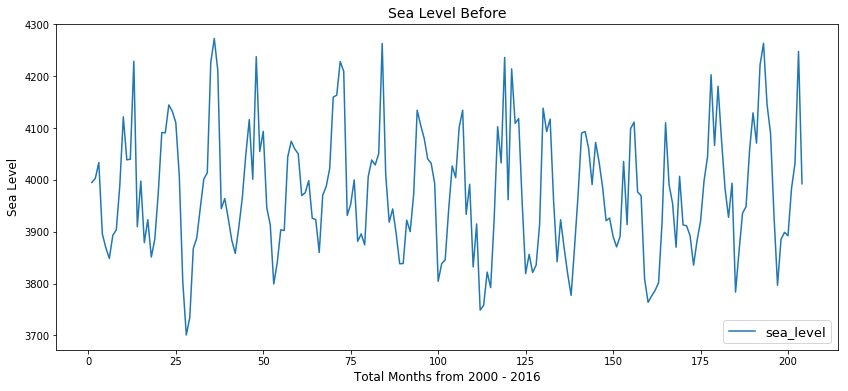

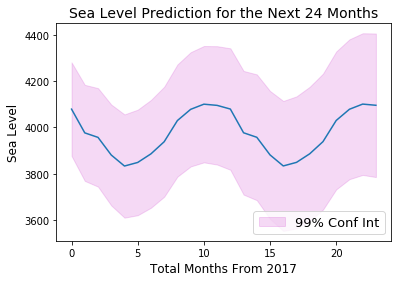

In [12]:
fig = plt.figure(figsize=(14,6))
#plt.plot(avg_month_df['sea_level'], label='Observed')
plt.plot(avg_month_df['line_num'],avg_month_df['sea_level'])


plt.xlabel('Total Months from 2000 - 2016', fontsize=12)
plt.ylabel('Sea Level', fontsize=12)
plt.title("Sea Level Before",
fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.show()
all_months = [i for i in range(1,25)]
tuple_data = zip(all_months, pred_point)
pred_data = [list(item) for item in tuple_data]


pred_df = pd.DataFrame(np.array(pred_data), columns = ['months','pred_result'])

plt.plot(pred_point)
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],color='m', alpha=.15, label='99% Conf Int')
plt.xlabel('Total Months From 2017', fontsize=12)
plt.ylabel('Sea Level', fontsize=12)
plt.title("Sea Level Prediction for the Next 24 Months",
fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.show()
plt.show()

### Prediction for All Cities on Both Coasts.
A a final calculation, we used the same methodology to forecasts sea levels in all the areas that cover West and East coasts of United States.

**Note.-** We do not include cities that had missing data, in our dataframes, or where the required years of the data calculated were missing in the original dataset. The For/Loops below exclude such sities from our dataframes.

In [22]:
for key in east_d_dict:
    df = east_d_dict[key].loc[(east_d_dict[key]['year'] >= 2000)]#keep the years after 2000
    for year in range(2000, 2017):
        year_df = df[df['year'] == year]
        if(year_df.shape[0] < 365):#if the year's day number is fewer than 365, there must be a lack
            del east_d_dict[key]
for key in west_d_dict:
    df = west_d_dict[key].loc[(west_d_dict[key]['year'] >= 2000)]#keep the years after 2000
    for year in range(2000, 2017):
        year_df = df[df['year'] == year]
        if(year_df.shape[0] < 365):#if the year's day number is fewer than 365, there must be a lack
            del west_d_dict[key]

The predictions below are divided in East and West coasts, so the first graph contain the estimated forecast for the next 24 months in the East coast, and the second the next 24 months for the West coast.

In [30]:
east_d_pred = {}

for key in east_d_dict:#predict the east areas
    
    df = east_d_dict[key]
    df = df[df['year'] >= 2000]
    avg_month_df = pd.DataFrame(columns = ('year', 'month', 'sea_level','all_months'))
    
    all_months = 0
    for year in range(2000, 2017):
        year_df = df[df['year'] == year]
        
        for month in range(1, 13):
            month_df = year_df[year_df['month'] == month]
            days_in_a_month = (month_df.shape[0])
            sea_level_avg = month_df['sea_level'].sum()/days_in_a_month
            avg_month_df.loc[all_months] = [year, month, sea_level_avg,all_months + 1]
            #print(avg_month_df)
            #print("\n")
            all_months += 1
    #print(key,avg_month_df)
    #print("\n")
    model = SARIMAX(avg_month_df['sea_level'].tolist(),order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
    result = model.fit()
    pred = result.get_forecast(steps=24)
    pred_point = pred.predicted_mean
    pred_ci = pred.conf_int(alpha=0.01)
    pred_df = pd.DataFrame(pred_point)
    all_months = [i for i in range(1,25)]
    tuple_data = zip(all_months, pred_point)
    pred_data = [list(item) for item in tuple_data]
    pred_df = pd.DataFrame(np.array(pred_data), columns = ['months','pred_result_mean'])
    pred_df[pred_ci.columns[0]] = pred_ci[pred_ci.columns[0]]
    pred_df[pred_ci.columns[1]] = pred_ci[pred_ci.columns[1]]
    east_d_pred[key] = pred_df
    print("******EAST COAST CITIES****** \n\n")
    print(east_d_pred)

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

******EAST COAST CITIES****** 


{'Apalachicola_d.csv':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13

In [31]:
west_d_pred = {}
for key in west_d_dict:#do the same as west areas
    
    df = west_d_dict[key]
    df = df[df['year'] >= 2000]
    avg_month_df = pd.DataFrame(columns = ('year', 'month', 'sea_level','all_months'))
    
    all_months = 0
    for year in range(2000, 2017):
        year_df = df[df['year'] == year]
        
        for month in range(1, 13):
            month_df = year_df[year_df['month'] == month]
            days_in_a_month = (month_df.shape[0])
            sea_level_avg = month_df['sea_level'].sum()/days_in_a_month
            avg_month_df.loc[all_months] = [year, month, sea_level_avg,all_months + 1]
            all_months += 1
    
    model = SARIMAX(avg_month_df['sea_level'].tolist(),order=(0, 1, 1),seasonal_order=(0, 1, 1, 12))
    result = model.fit()
    pred = result.get_forecast(steps=24)
    pred_point = pred.predicted_mean
    pred_ci = pred.conf_int(alpha=0.01)
    pred_df = pd.DataFrame(pred_point)
    all_months = [i for i in range(1,25)]
    tuple_data = zip(all_months, pred_point)
    pred_data = [list(item) for item in tuple_data]
    pred_df = pd.DataFrame(np.array(pred_data), columns = ['months','pred_result_mean'])
    pred_df[pred_ci.columns[0]] = pred_ci[pred_ci.columns[0]]
    pred_df[pred_ci.columns[1]] = pred_ci[pred_ci.columns[1]]
    west_d_pred[key] = pred_df
    print("******WEST COAST CITIES****** \n\n")
    print(west_d_pred)

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

******WEST COAST CITIES****** 


{'Arena Cove_d.csv':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0 

We managed two dictionaries; in each dictionary, the key is the filename (or city name), and the value is a dataset of values for that specific city. The dataframe has four columns: months (from 2017.1 to 2018.12), predresult (mean), lower y (lower bound) and the upper y (upper bound). The last two values correspond to the lowest point that could be reach and the upper bound corresponds to the highest level that could be reach in the next 24 months on sea levels in US coasts.

Finally, we changed the key name from filename to a location name and obtained the following result:

In [37]:
west_pred = {}
east_pred = {}
for key in east_d_pred:
    k = key.rfind("_")
    location_name = key[:k]
    east_pred[location_name] = east_d_pred[key] 
    print(east_pred)
     
for key in west_d_pred:
    k = key.rfind("_")
    location_name = key[:k]
    west_pred[location_name] = west_d_pred[key]
    print(west_pred)

{'Apalachicola':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0    

{'Apalachicola':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0    

{'Apalachicola':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0    

{'Apalachicola':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0    

{'Apalachicola':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0    

{'Apalachicola':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0    

{'Apalachicola':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0    

{'Apalachicola':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0    

{'Apalachicola':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0    

{'Apalachicola':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0    

{'Apalachicola':     months  pred_result_mean       lower y       upper y
0      1.0       1156.271154 -10222.387711  12534.930018
1      2.0       2463.200216  -9285.671001  14212.071432
2      3.0       2333.870909  -9774.026048  14441.767866
3      4.0       2440.926977 -10015.734455  14897.588409
4      5.0        793.172614 -12002.811781  13589.157009
5      6.0        502.460859 -12624.131655  13629.053373
6      7.0       2186.433494 -11262.699587  15635.566575
7      8.0       2467.023244 -11297.164005  16231.210494
8      9.0       1934.099754 -12138.182758  16006.382267
9     10.0       2650.657978 -11723.246713  17024.562669
10    11.0       2457.406088 -12212.103930  17126.916106
11    12.0        693.012590 -14267.407149  15653.432329
12    13.0       1219.523941 -14152.331282  16591.379164
13    14.0       2526.453003 -13150.601417  18203.507423
14    15.0       2397.123697 -13579.503086  18373.750479
15    16.0       2504.179764 -13766.638749  18774.998278
16    17.0    

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

{'Arena Cove':     months  pred_result_mean      lower y      upper y
0      1.0       3937.051725  3457.510708  4416.592742
1      2.0       3855.629184  3376.088032  4335.170336
2      3.0       3850.035168  3370.493881  4329.576455
3      4.0       3744.357072  3264.815650  4223.898494
4      5.0       3784.653082  3305.111525  4264.194639
5      6.0       3812.490907  3332.949215  4292.032599
6      7.0       3859.221221  3379.679394  4338.763048
7      8.0       3893.119312  3413.577350  4372.661274
8      9.0       3908.478247  3428.936150  4388.020344
9     10.0       3933.390286  3453.848054  4412.932518
10    11.0       3911.475416  3431.933049  4391.017783
11    12.0       3908.641734  3429.099232  4388.184237
12    13.0       3950.128810  3408.050945  4492.206676
13    14.0       3868.706269  3326.628127  4410.784411
14    15.0       3863.112253  3321.033835  4405.190671
15    16.0       3757.434157  3215.355462  4299.512851
16    17.0       3797.730167  3255.651197  4339.80

### Limitations 
One of our limitations on this work relates to the different timeframes on which data started to be collected by the agency; therefore, the following cities are not included in our data set:

> **West Coast**
- Kaomalapau no data for years 1997, 2016 
- Nome and Willapa no data for 2016
- Portenllen no data in any of the years selected

> **East Coast**
- Cocoa Beach no data in any of the years selected
- Galveston no data for 2016
- May Port and south Path had no data for years 2008, 2016 

## V. Conclusions
1. Overall the Arima model on time series provide a great way to fit data that falls over periods of time, and even though it can be time intensive; gives us a good overview to see certain patterns in the data  over time.
2. Although there is a vast amount of data on sea levels, it is not all consistent, some cities have records olders than others, which adds as a limitation when doing this type of studies.
3. The more data we can have the more precise the results will  be.
4. Due to many factors such as global warming, volcanoes and pollution, that increases oceans temperature it difficult to predict based on past data, since those factors were not affecting in previous years.

**Note.-** Behind the realization of this project there was a great learning experience, Both participants learned from each other.

## References

1. [Church and N. White, "A 20th century acceleration in global sea-level rise", Geophysical Research Letters, vol. 33, no. 1, p. n/a-n/a, 2006.](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2005GL024826)

2. [G. Foster and P. Brown, "Time and tide: analysis of sea level time series", Climate Dynamics, vol. 45, no. 1-2, pp. 291-308, 2014.](https://www.researchgate.net/publication/265467321_Time_and_tide_analysis_of_sea_level_time_series)

3. ["Is sea level rising?", Oceanservice.noaa.gov, 2018. Online.](https://oceanservice.noaa.gov/facts/sealevel.html) 

4. ["Time Series Analysis and Forecasting with Weka - Pentaho Data Mining - Pentaho Wiki", Wiki.pentaho.com, 2018. Online.](https://wiki.pentaho.com/display/DATAMINING/Time+Series+Analysis+and+Forecasting+with+Weka#TimeSeriesAnalysisandForecastingwithWeka-1Introduction)

5. [Time Series Optional Lecture](https://www.youtube.com/watch?v=ks6S2LnFWo8&feature=youtu.be)

6. [ VanderPlas, "Geographic Data with Basemap | Python Data Science Handbook", Jakevdp.github.io, 2018. Online.](https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html)

7. ["matplotlib basemap toolkit — Basemap Matplotlib Toolkit 1.1.0 documentation", Matplotlib.org, 2018. Online.](https://matplotlib.org/basemap/api/basemap_api.html#module-mpl_toolkits.basemap)

8. ["New Study Finds Sea Level Rise Accelerating", NASA, 2018. Online](https://www.nasa.gov/feature/goddard/2018/new-study-finds-sea-level-rise-accelerating). 

9. ["Sea Level Rise", Nationalgeographic.com, 2018.](https://www.nationalgeographic.com/environment/global-warming/sea-level-rise/)